In [1]:
from main import load_edgelist
from typing import List, Dict
from paco import TimeStampedLinkList, paco
from time import time
from tqdm import tqdm
import matplotlib.pyplot as plt
from baseline import create_temporal_network, get_total_causal_paths
import pandas as pd

In [2]:
dataset = pd.read_csv('CollegeMsg.txt', delimiter=' ', header=None)
dataset.columns = ['source', 'target', 'timestamp']
edge_list = [(row['source'], row['target'], int(row['timestamp'])) for _, row in dataset.iterrows()]

In [3]:
data = TimeStampedLinkList.from_edgelist(edge_list)

In [4]:
# delta, K
fixed_k_config = [
    (1, 3),
    (2, 3),
    (3, 3),
    (5, 3),
    (10, 3),
    (15, 3)
]

## PaCo

In [5]:
def execute_paco(delta, k):
    start = time()
    C = paco(data, delta, k)
    end = time()
    
    count = sum(C.values())
    return count, end-start

In [6]:
results = []
for delta_sec, k in tqdm(fixed_k_config):
    result = execute_paco(delta_sec, k)
    results.append(result)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00,  7.72it/s]


In [7]:
#runtimes_min = [runtime_sec / 60 for _, runtime_sec in results]
#deltas_min = [delta_sec / 60 for delta_sec, _ in fixed_k_config]
_, paco_runtimes_sec = zip(*results)
paco_deltas_sec, _ = zip(*fixed_k_config)

## Baseline

In [8]:
t = create_temporal_network(edge_list)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 59835/59835 [00:01<00:00, 57184.84it/s]


In [9]:
results = []
for delta_sec, k in tqdm(fixed_k_config):
    result = get_total_causal_paths(t, delta_sec, k)
    results.append(result)

  0%|                                                                                                                                                                                         | 0/6 [00:00<?, ?it/s]

2023-12-17 21:15:16 [Severity.INFO]	Constructing time-unfolded DAG ...
2023-12-17 21:15:16 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		119386
Roots:		59607
Leaves:		59725
Links:		59798
Acyclic:	None

2023-12-17 21:15:16 [Severity.INFO]	Generating causal trees for 59607 root nodes ...
2023-12-17 21:15:18 [Severity.INFO]	finished.


 17%|█████████████████████████████▌                                                                                                                                                   | 1/6 [00:01<00:09,  1.90s/it]

Number of causal paths: Total path count: 		59744.0 
[Unique / Sub paths / Total]: 	[20348.0 / 119704.0 / 179448.0]
Nodes:				1899 
Edges:				20296
Max. path length:		2
Avg path length:		1.0012051419389394 
Paths of length k = 0		0.0 [ 0.0 / 119560.0 / 119560.0 ]
Paths of length k = 1		59672.0 [ 20276.0 / 144.0 / 59816.0 ]
Paths of length k = 2		72.0 [ 72.0 / 0.0 / 72.0 ]


2023-12-17 21:15:18 [Severity.INFO]	Constructing time-unfolded DAG ...
2023-12-17 21:15:19 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		179063
Roots:		59572
Leaves:		119402
Links:		119596
Acyclic:	None

2023-12-17 21:15:19 [Severity.INFO]	Generating causal trees for 59572 root nodes ...
2023-12-17 21:15:20 [Severity.INFO]	finished.


 33%|███████████████████████████████████████████████████████████                                                                                                                      | 2/6 [00:04<00:08,  2.15s/it]

Number of causal paths: Total path count: 		59710.0 
[Unique / Sub paths / Total]: 	[20387.0 / 119807.0 / 179517.0]
Nodes:				1899 
Edges:				20296
Max. path length:		2
Avg path length:		1.0021604421369954 
Paths of length k = 0		0.0 [ 0.0 / 119549.0 / 119549.0 ]
Paths of length k = 1		59581.0 [ 20259.0 / 258.0 / 59839.0 ]
Paths of length k = 2		129.0 [ 128.0 / 0.0 / 129.0 ]


2023-12-17 21:15:20 [Severity.INFO]	Constructing time-unfolded DAG ...
2023-12-17 21:15:21 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		238657
Roots:		59535
Leaves:		178996
Links:		179394
Acyclic:	None

2023-12-17 21:15:21 [Severity.INFO]	Generating causal trees for 59535 root nodes ...
2023-12-17 21:15:21 [Severity.INFO]	Analyzing tree 11907/59535 ...
2023-12-17 21:15:22 [Severity.INFO]	Analyzing tree 23814/59535 ...
2023-12-17 21:15:22 [Severity.INFO]	Analyzing tree 35721/59535 ...
2023-12-17 21:15:22 [Severity.INFO]	Analyzing tree 47628/59535 ...
2023-12-17 21:15:23 [Severity.INFO]	Analyzing tree 5

 50%|████████████████████████████████████████████████████████████████████████████████████████▌                                                                                        | 3/6 [00:06<00:07,  2.42s/it]

Number of causal paths: Total path count: 		59669.0 
[Unique / Sub paths / Total]: 	[20417.0 / 119890.0 / 179559.0]
Nodes:				1899 
Edges:				20296
Max. path length:		2
Avg path length:		1.0030836782919104 
Paths of length k = 0		0.0 [ 0.0 / 119522.0 / 119522.0 ]
Paths of length k = 1		59485.0 [ 20235.0 / 368.0 / 59853.0 ]
Paths of length k = 2		184.0 [ 182.0 / 0.0 / 184.0 ]


2023-12-17 21:15:23 [Severity.INFO]	Constructing time-unfolded DAG ...
2023-12-17 21:15:25 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		357630
Roots:		59453
Leaves:		297969
Links:		298990
Acyclic:	None

2023-12-17 21:15:25 [Severity.INFO]	Generating causal trees for 59453 root nodes ...
2023-12-17 21:15:26 [Severity.INFO]	finished.


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                           | 4/6 [00:10<00:05,  2.87s/it]

Number of causal paths: Total path count: 		59588.0 
[Unique / Sub paths / Total]: 	[20484.0 / 119986.0 / 179574.0]
Nodes:				1899 
Edges:				20296
Max. path length:		2
Avg path length:		1.004531113647043 
Paths of length k = 0		0.0 [ 0.0 / 119446.0 / 119446.0 ]
Paths of length k = 1		59318.0 [ 20220.0 / 540.0 / 59858.0 ]
Paths of length k = 2		270.0 [ 264.0 / 0.0 / 270.0 ]


2023-12-17 21:15:26 [Severity.INFO]	Constructing time-unfolded DAG ...
2023-12-17 21:15:31 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		653444
Roots:		59224
Leaves:		593783
Links:		597980
Acyclic:	None

2023-12-17 21:15:31 [Severity.INFO]	Generating causal trees for 59224 root nodes ...
2023-12-17 21:15:32 [Severity.INFO]	finished.


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 5/6 [00:16<00:04,  4.09s/it]

Number of causal paths: Total path count: 		59361.0 
[Unique / Sub paths / Total]: 	[20637.0 / 120222.0 / 179583.0]
Nodes:				1899 
Edges:				20296
Max. path length:		3
Avg path length:		1.008406192618049 
Paths of length k = 0		0.0 [ 0.0 / 119221.0 / 119221.0 ]
Paths of length k = 1		58865.0 [ 20169.0 / 995.0 / 59860.0 ]
Paths of length k = 2		493.0 [ 465.0 / 6.0 / 499.0 ]
Paths of length k = 3		3.0 [ 3.0 / 0.0 / 3.0 ]


2023-12-17 21:15:33 [Severity.INFO]	Constructing time-unfolded DAG ...
2023-12-17 21:15:39 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		947044
Roots:		58958
Leaves:		887383
Links:		896970
Acyclic:	None

2023-12-17 21:15:39 [Severity.INFO]	Generating causal trees for 58958 root nodes ...
2023-12-17 21:15:41 [Severity.INFO]	finished.
Number of causal paths: Total path count: 		59098.0 
[Unique / Sub paths / Total]: 	[20815.0 / 120527.0 / 179625.0]
Nodes:				1899 
Edges:				20296
Max. path length:		4
Avg path length:		1.0130122846796845 
Paths of length k = 0

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:25<00:00,  4.27s/it]


In [10]:
_, baseline_runtimes_sec = zip(*results)
baseline_deltas_sec, _ = zip(*fixed_k_config)

## Plots

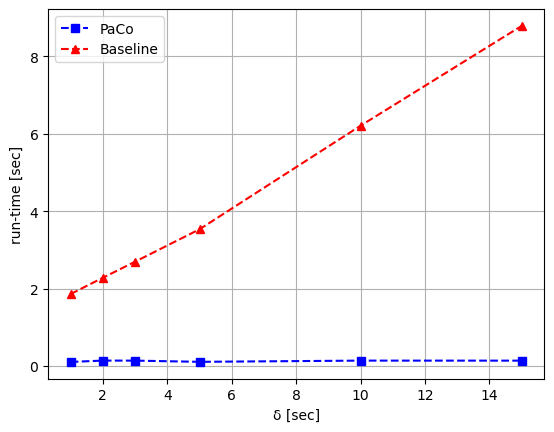

In [12]:
plt.plot(paco_deltas_sec, paco_runtimes_sec, 's--', color='blue',label="PaCo")
plt.plot(baseline_deltas_sec, baseline_runtimes_sec, '^--', color='red',label="Baseline")
plt.xlabel("δ [sec]")
plt.ylabel("run-time [sec]")
plt.grid(True)
plt.legend()
plt.savefig('plots/collegemsg_middle_panel.png')
plt.show()